## PRCP-1012-GameWinnerPred

### PROBLEM STATEMENT

#### Task 1:-Prepare a complete data analysis report on the given data.. 


##### Task 2:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game.

#### Task-1 :Data Analysis Report

#### Import Libraries

In [176]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [178]:
# load data
data =pd.read_csv("pubg.csv")

In [180]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [182]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [186]:
data.shape

(4446966, 29)

#### Sure, here are the attributes described in a single line each:

* DBNOs: Number of enemy players knocked.

* Assists: Number of enemy players damaged by this player that were killed by teammates.

* Boosts: Number of boost items used.

* DamageDealt: Total damage dealt, excluding self-inflicted damage.

* HeadshotKills: Number of enemy players killed with headshots.

* Heals: Number of healing items used.

* Id: Player’s unique identifier.

* KillPlace: Ranking in match based on number of enemy players killed.

* KillPoints: Kills-based external ranking of the player.

* Kills: Number of enemy players killed.

* LongestKill: Longest distance between player and enemy at the time of death.

* MatchId: Unique identifier for each match.

* Revives: Number of times the player revived teammates.

* RideDistance: Total distance traveled in vehicles.

* RoadKills: Number of kills made while in a vehicle.

* SwimDistance: Total distance traveled by swimming.

* TeamKills: Number of times the player killed a teammate.

* VehicleDestroys: Number of vehicles destroyed.

### Step 2: Exploratory Data Analysis (EDA)

In [13]:
# Summary statistics
print(data.describe())


            assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
mean   2.338149e-01  1.106908e+00  1.307171e+02  6.578755e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.707806e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
std    2.679982e+00  2.746294e+01  6.27504

In [14]:
# Missing values
print(data.isnull().sum())


Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64


####  Easily understand data

In [18]:
from summarytools import dfSummary
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Id[object],1. 7f96b2f878858a2. d19659ceb5b5533. b587ef96cf8d874. 66715fcb3b871d5. 59e0d2fdd292a86. b6f576059618a97. e8baed0d4117bd8. 684772a1ddbe339. d563480639471c10. bd2af8fb9038e711. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)4,446,956 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,groupId[object],1. 14d6b54cdec6bc2. b8275198faa03b3. 128b07271aa0124. 7385e5fe2140215. e52a2e6ca304746. a3bc33847d23047. e8d2b3018f9d698. 6cf057e17002ff9. cc0f7324bf3b3410. 566ed94d7d1fd211. other,"74 (0.0%)72 (0.0%)64 (0.0%)49 (0.0%)36 (0.0%)31 (0.0%)28 (0.0%)28 (0.0%)27 (0.0%)27 (0.0%)4,446,530 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,matchId[object],1. 4b5db40aec47972. b10e8738adafb93. bc28c54250342d4. c2db47653f79b75. 79e05d7908e0ca6. e0be79c00160fc7. 4be1b509b5e3428. 9455bb8644e4c49. 93ca47a5cd539910. b20e089d3322bd11. other,"100 (0.0%)100 (0.0%)100 (0.0%)100 (0.0%)100 (0.0%)100 (0.0%)100 (0.0%)100 (0.0%)100 (0.0%)100 (0.0%)4,445,966 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E

In [20]:
# Number of matches played in each player
len(data.matchId.unique())

47965

In [188]:
 #remove that row
data.dropna(inplace = True)

understanding the player distribution

In [190]:
data['playerjoined']=data.groupby('matchId')['matchId'].transform('count')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


(<Figure size 1500x800 with 1 Axes>, <Axes: >)

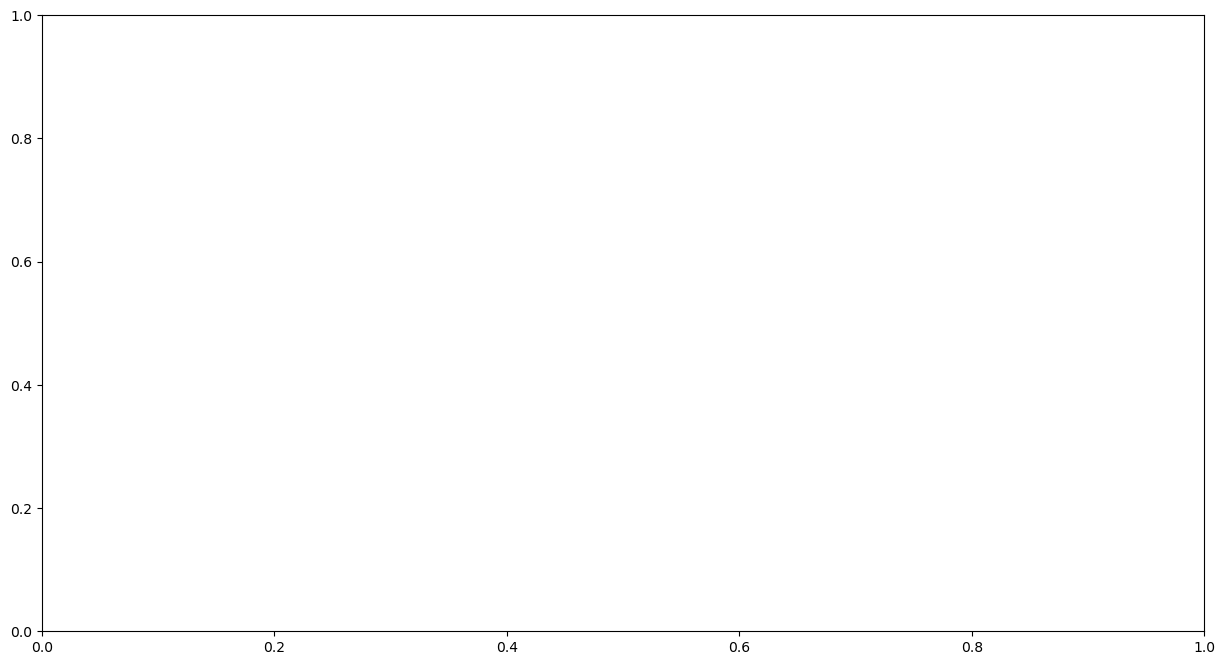

In [192]:
plt.subplots(figsize=(15,8))
#sns.countplot(data[data['playerjoined']>=60]['playerjoined'])


### outliers detectors

In [194]:
# prepare a data parameter to gather the information of the total distance travelled
data['totaldistance']=data['walkDistance'] + data['rideDistance'] + data['swimDistance']


#### Kill Without Moving

In [196]:

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
data['killwithoutmoving']=((data['kills']>0) & (data['totaldistance']==0))

In [198]:
# find the count.
data['killwithoutmoving'].value_counts()


killwithoutmoving
False    4445430
True        1535
Name: count, dtype: int64

players who travel zero distance yet they have killed enemies seems suspicious, hence removing those rows!!¶

In [200]:
data[data['killwithoutmoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [46]:
data[data['killwithoutmoving']==True].shape

(1535, 32)

In [202]:
# drop the table
data.drop(data[data['killwithoutmoving']== True].index , inplace = True)

#### how many  players extradinary road kills

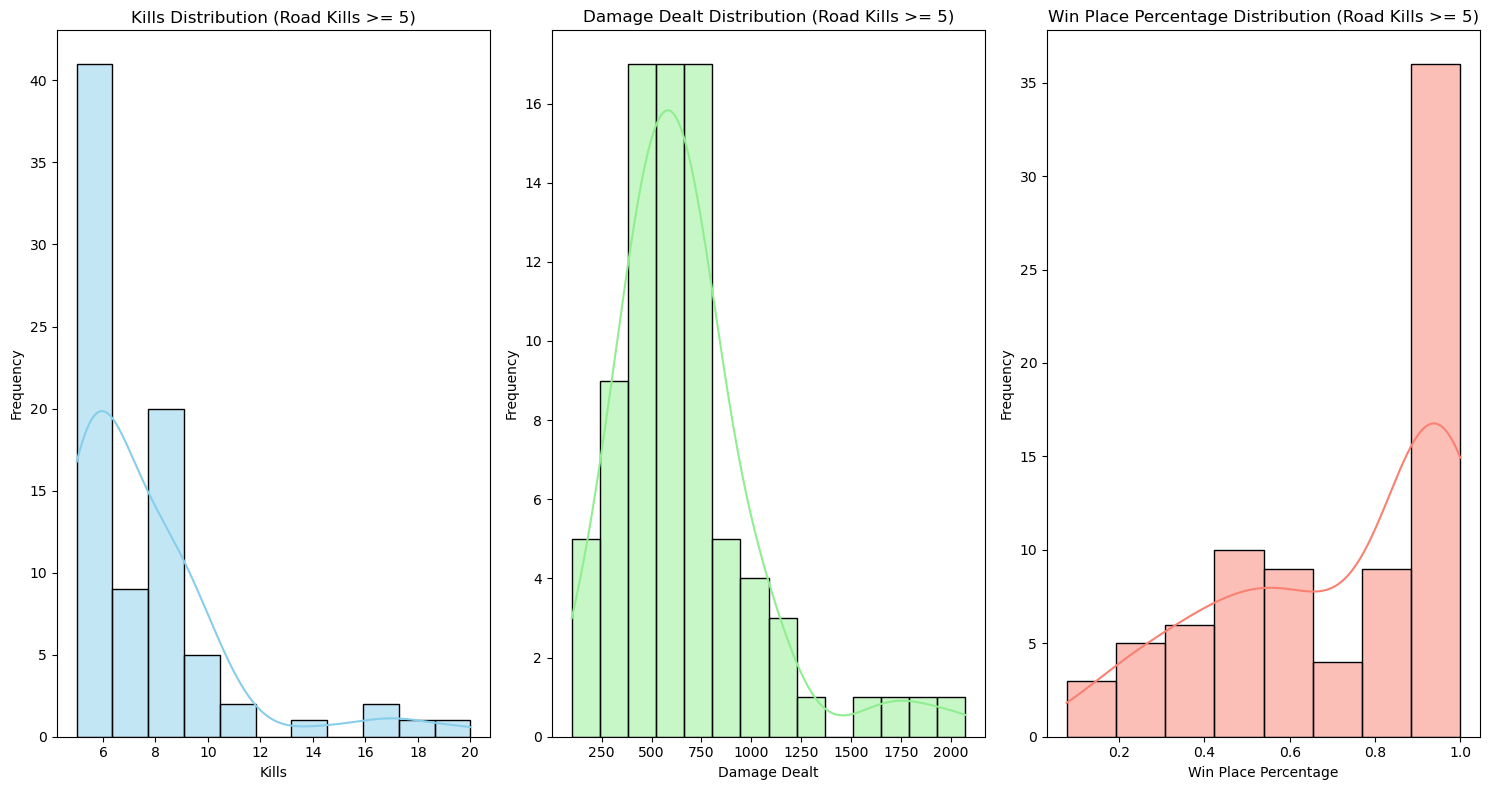

In [50]:

# Filter the data for players with 5 or more road kills
road_kills_data = data[data['roadKills'] >= 5]

# Plotting
plt.figure(figsize=(15, 8))

# Kills distribution
plt.subplot(1, 3, 1)
sns.histplot(road_kills_data['kills'], kde=True, color='skyblue')
plt.title('Kills Distribution (Road Kills >= 5)')
plt.xlabel('Kills')
plt.ylabel('Frequency')

# Damage dealt distribution
plt.subplot(1, 3, 2)
sns.histplot(road_kills_data['damageDealt'], kde=True, color='lightgreen')
plt.title('Damage Dealt Distribution (Road Kills >= 5)')
plt.xlabel('Damage Dealt')
plt.ylabel('Frequency')

# Win Place Percentage distribution
plt.subplot(1, 3, 3)
sns.histplot(road_kills_data['winPlacePerc'], kde=True, color='salmon')
plt.title('Win Place Percentage Distribution (Road Kills >= 5)')
plt.xlabel('Win Place Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* The bar plots illustrate the distribution of kills, damage dealt, and win place percentage for these players.

In [206]:
data.drop(data[data['roadKills']>=10].index , inplace= True)

#### in match how many player cannot kill more than 10 kills

In [209]:
# Calculate the number of players with 10 or fewer kills
num_players_10_or_less = data[data['kills'] <= 10].shape[0]
print(f"Number of players with 10 or fewer kills: {num_players_10_or_less}")


Number of players with 10 or fewer kills: 4437304


In [210]:
# number of players with more than 10 kills
data[data['kills'] > 10].shape

(8120, 32)

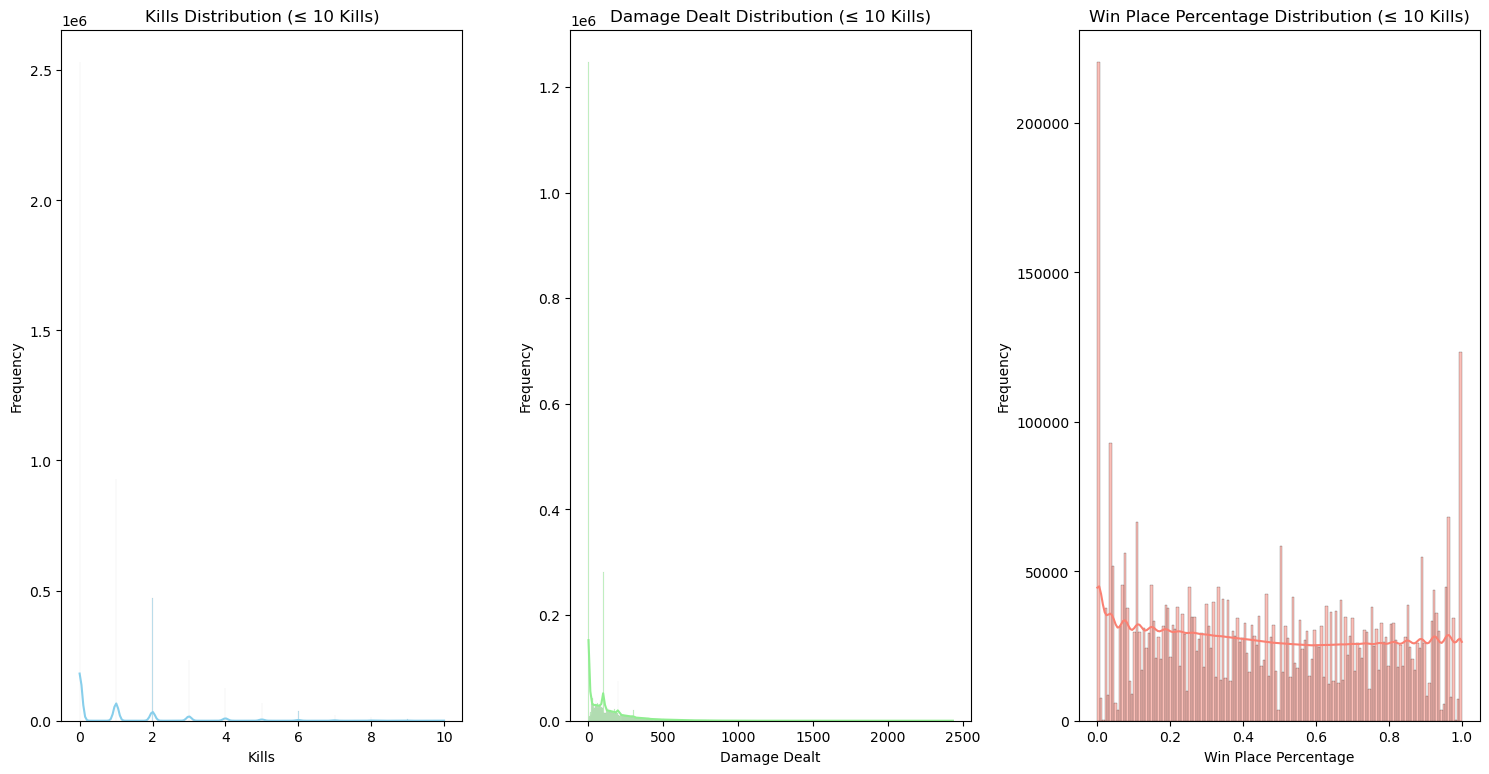

In [56]:

# Filter the data for players with 10 or fewer kills
kills_data = data[data['kills'] <= 10]

# Plotting
plt.figure(figsize=(15, 8))

# Kills distribution
plt.subplot(1, 3, 1)
sns.histplot(kills_data['kills'], kde=True, color='skyblue')
plt.title('Kills Distribution (≤ 10 Kills)')
plt.xlabel('Kills')
plt.ylabel('Frequency')

# Damage dealt distribution
plt.subplot(1, 3, 2)
sns.histplot(kills_data['damageDealt'], kde=True, color='lightgreen')
plt.title('Damage Dealt Distribution (≤ 10 Kills)')
plt.xlabel('Damage Dealt')
plt.ylabel('Frequency')

# Win Place Percentage distribution
plt.subplot(1, 3, 3)
sns.histplot(kills_data['winPlacePerc'], kde=True, color='salmon')
plt.title('Win Place Percentage Distribution (≤ 10 Kills)')
plt.xlabel('Win Place Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* Kills Distribution: Shows how many players have various kill counts up to 10.

* Damage Dealt Distribution: Visualizes the damage dealt by players who have 10 or fewer kills.

* Win Place Percentage Distribution: Illustrates the win place percentage for players with 10 or fewer kills.

In [213]:
# drop the instances
data.drop(data[data['kills'] > 35].index, inplace = True)

In [215]:
# Let's take a look at the players who make these shots. 
data[data['longestKill']>=1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0.00,0,1,3052.00,9,0,0.9231,88,3775.20,False
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.00,0,0,48.87,38,1500,0.5385,29,48.87,False
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,0.00,0,0,1264.00,26,0,1.0000,51,2981.00,False
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0.00,0,0,29.21,30,1500,0.6000,41,29.21,False
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0.00,0,0,1074.00,22,0,0.0000,61,3159.00,False
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0.00,0,0,569.50,18,0,0.9091,86,569.50,False
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0.00,0,0,832.50,9,1500,0.2857,58,832.50,False
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0.00,0,0,2848.00,4,1500,0.9412,52,2848.00,False
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,...,0.00,0,0,235.30,41,0,0.5000,28,235.30,False
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,...,0.00,0,0,133.20,43,0,0.6000,42,133.20,False


In [217]:
# Let's take a look at the players who make these shots. 
data[data['longestKill']>=1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0.00,0,1,3052.00,9,0,0.9231,88,3775.20,False
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.00,0,0,48.87,38,1500,0.5385,29,48.87,False
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,0.00,0,0,1264.00,26,0,1.0000,51,2981.00,False
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0.00,0,0,29.21,30,1500,0.6000,41,29.21,False
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0.00,0,0,1074.00,22,0,0.0000,61,3159.00,False
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0.00,0,0,569.50,18,0,0.9091,86,569.50,False
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0.00,0,0,832.50,9,1500,0.2857,58,832.50,False
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0.00,0,0,2848.00,4,1500,0.9412,52,2848.00,False
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,...,0.00,0,0,235.30,41,0,0.5000,28,235.30,False
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,...,0.00,0,0,133.20,43,0,0.6000,42,133.20,False


In [219]:
data.drop(data[data['longestKill']>=1000].index,inplace=True)


In [220]:
#Let's check out anomalies in Distance travelled.

data[['rideDistance','walkDistance','swimDistance','totaldistance']].head()

,rideDistance,walkDistance,swimDistance,totaldistance
0,0.0000,244.80,0.00,244.8000
1,0.0045,1434.00,11.04,1445.0445
2,0.0000,161.80,0.00,161.8000
3,0.0000,202.70,0.00,202.7000
4,0.0000,49.75,0.00,49.7500


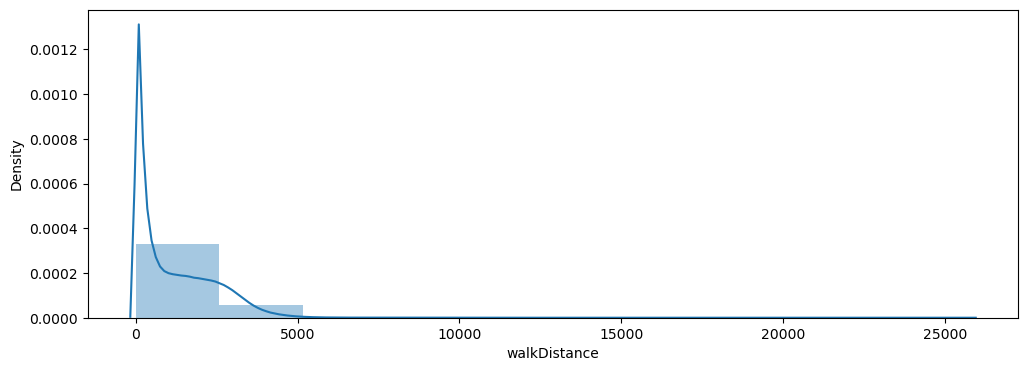

In [86]:
# plot walkDistance 

plt.figure(figsize=(12,4))
sns.distplot(data['walkDistance'], bins=10)
plt.show()

In [223]:
#remove outliers
data.drop(data[data['walkDistance']>=10000].index,inplace=True)


<Axes: xlabel='swimDistance', ylabel='Density'>

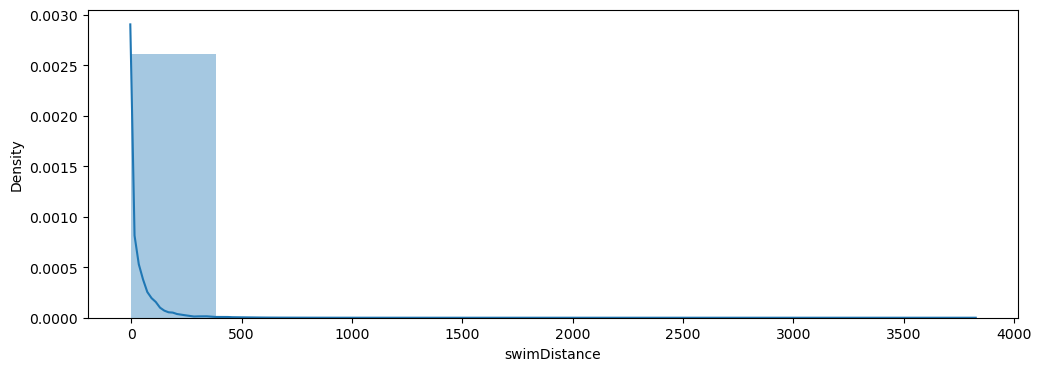

In [225]:
plt.subplots(figsize=(12, 4))
sns.distplot(data.swimDistance,bins=10)

In [227]:
data[data['swimDistance']>=1000].shape

(138, 32)

In [229]:
#remove outliear
data.drop(data[data.swimDistance>=1000].index,inplace=True)


<Axes: xlabel='totaldistance', ylabel='Density'>

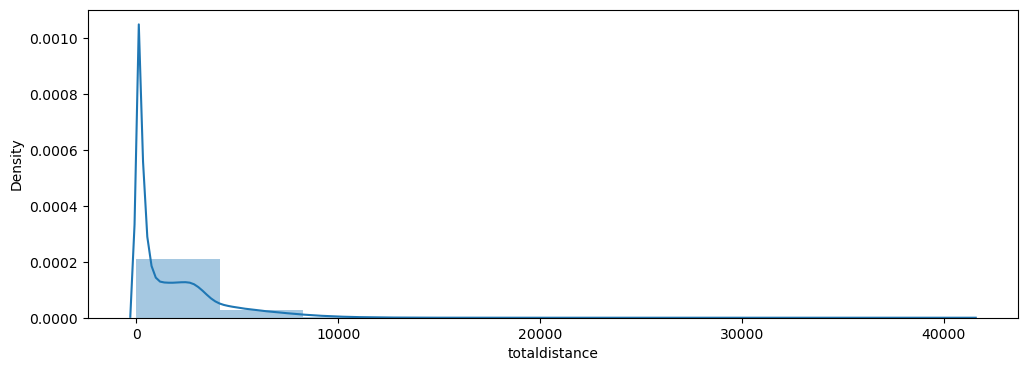

In [231]:
# total_distance
plt.subplots(figsize=(12,4))
sns.distplot(data.totaldistance,bins=10)

In [233]:
data[data.totaldistance>=15000].shape
data.drop(data[data.totaldistance>=15000].index,inplace=True)


#### HEAD SHOTS

In [236]:
data['headshot_rate'] = data['headshotKills']/data['kills']
data['headshot_rate'] = data['headshot_rate'].fillna(0)

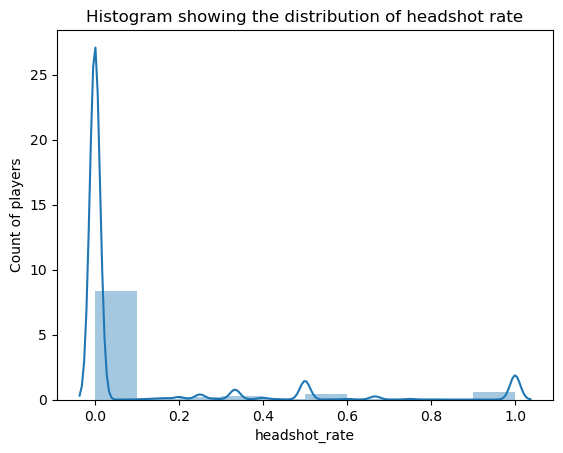

In [238]:
# plot the headshot rate distribution
sns.distplot(data['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [239]:
data[(data['headshot_rate'] ==1) & (data['kills']>10)].shape

(13, 33)

###  FINDING LONGEST HEADSHOTS

In [241]:
# Filter for entries with headshot kills
headshot_data = data[data['headshotKills'] > 0]

# Find the longest headshot
longest_headshot = headshot_data['longestKill'].max()
print(f"Longest headshot kill distance: {longest_headshot} meters")


Longest headshot kill distance: 999.9 meters


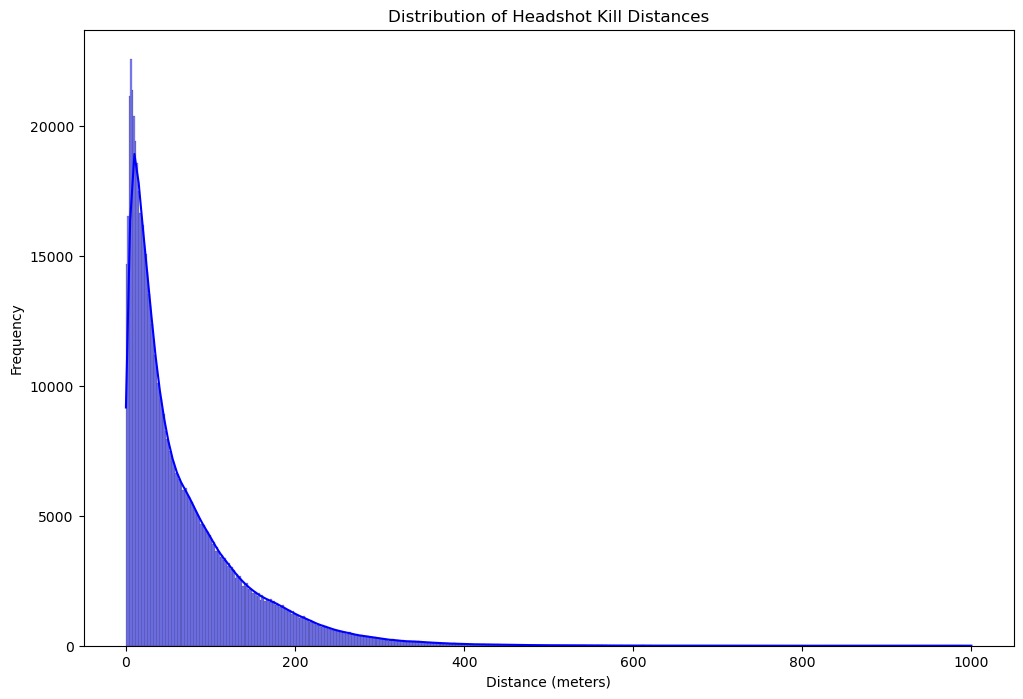

In [242]:

# Plotting the distribution of headshot kill distances
plt.figure(figsize=(12, 8))
sns.histplot(headshot_data['longestKill'], kde=True, color='blue')
plt.title('Distribution of Headshot Kill Distances')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()


* Players achieving kills from distances over 500 meters might exhibit suspicious behavior. Therefore, it's prudent to remove these players from the dataset to ensure the integrity of the analysis.

In [247]:
data[data['longestKill']>=450].shape

(2942, 33)

In [249]:
data.drop(data[data['longestKill']>=450].index, inplace = True)

### player weapon changing analyse

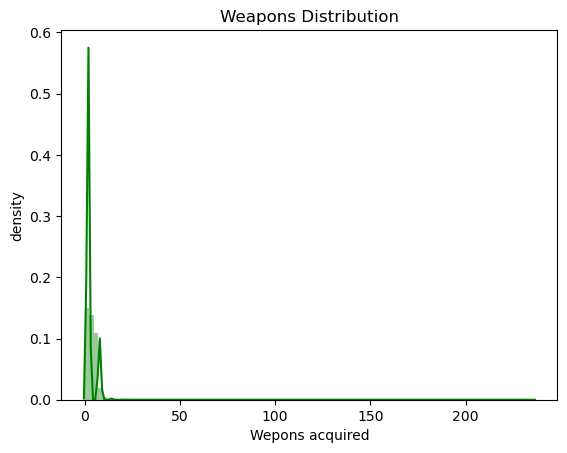

In [252]:
sns.distplot(data['weaponsAcquired'], bins=100,color='green')
plt.title("Weapons Distribution")
plt.ylabel("density")
plt.xlabel("Wepons acquired")
plt.show()

In [254]:
data[data['weaponsAcquired']>=15].shape

(7072, 33)

In [256]:
#remove outliear
#train
data.drop(data[data.weaponsAcquired>=20].index,inplace=True)


### anomalies in heals
* heals=number of healing items used

<Axes: xlabel='heals', ylabel='Density'>

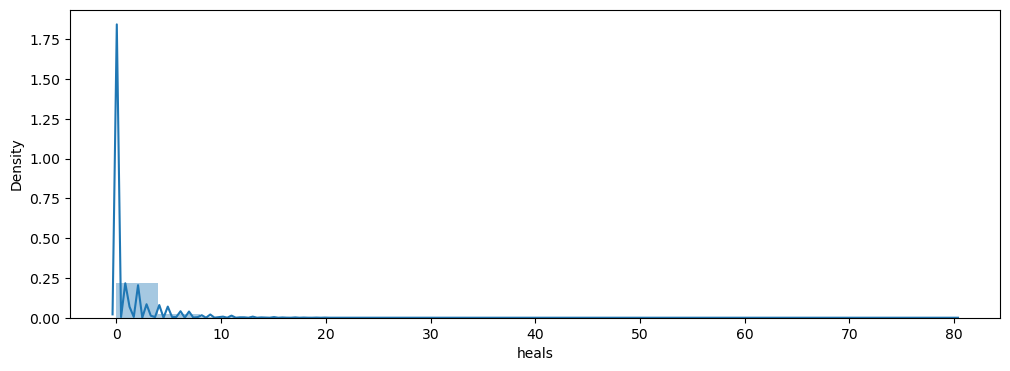

In [259]:
#heals 
#distplot

plt.subplots(figsize=(12,4))
sns.distplot(data.heals, bins=20)

In [260]:
data[data.heals>=35].shape

(321, 33)

In [263]:
# remove outliers
data.drop(data[data.heals>=35].index,inplace=True)

#### after removing all outliers

In [265]:
data.shape

(4437544, 33)

## categoricalesl variables

In [270]:
# Create the dummy variable for categorical variable present in our data set.
#matchType
#data# Sample 10% of the data
data_sample = data.sample(frac=0.1, random_state=42)
data_sample = pd.get_dummies(data_sample, columns=['matchType'])
print(data_sample.head())
data = pd.get_dummies(data, columns=['matchType'], sparse=True)
print(data.head())




MemoryError: Unable to allocate 27.1 MiB for an array with shape (8, 443754) and data type float64

In [169]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups',
       'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance',
       'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'playerjoined', 'totaldistance',
       'killwithoutmoving', 'headshot_rate', 'matchType_duo', 'matchType_solo',
       'matchType_squad'],
      dtype='object')

In [150]:
data.shape

(4431002, 35)

Now If you guys planning to create dummy variable of matchId and groupId ..

For me it's like getting into a sucidal trap.

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4431002 entries, 0 to 4446965
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Id                 object 
 1   groupId            object 
 2   matchId            object 
 3   assists            int64  
 4   boosts             int64  
 5   damageDealt        float64
 6   DBNOs              int64  
 7   headshotKills      int64  
 8   heals              int64  
 9   killPlace          int64  
 10  killPoints         int64  
 11  kills              int64  
 12  killStreaks        int64  
 13  longestKill        float64
 14  matchDuration      int64  
 15  maxPlace           int64  
 16  numGroups          int64  
 17  rankPoints         int64  
 18  revives            int64  
 19  rideDistance       float64
 20  roadKills          int64  
 21  swimDistance       float64
 22  teamKills          int64  
 23  vehicleDestroys    int64  
 24  walkDistance       float64
 25  weaponsAcquired    int6

In [172]:
# unique values
for i in ['Id','groupId','matchId']:
 print(f'unique {i} count:',data[i].nunique())

unique Id count: 4431002
unique groupId count: 2022913
unique matchId count: 47935


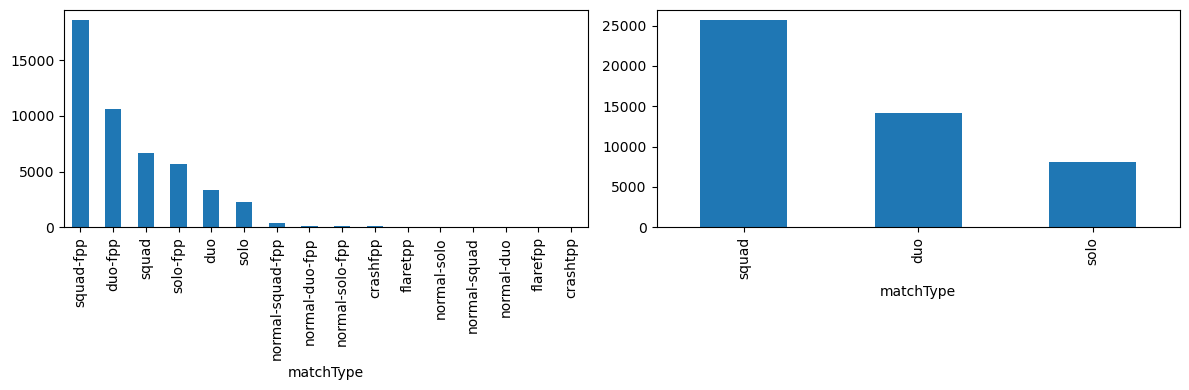

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot original matchType distribution
data.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

# Define the mapper function with a check for non-string values
mapper = lambda x: 'solo' if isinstance(x, str) and 'solo' in x else 'duo' if isinstance(x, str) and ('duo' in x or 'crash' in x) else 'squad'

# Apply the mapper function to the 'matchType' column
data['matchType'] = data['matchType'].apply(mapper)

# Plot modified matchType distribution
data.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

plt.tight_layout()
plt.show()


### Player Analysis
* players in match and group during a game, 100 players join the same server .so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.

In [174]:
import itertools
# Corrected function to merge two lists using itertools.product
def mergeList(list1, list2):
    return list(itertools.product(list1, list2))

# Grouping the data
match = data.groupby(['matchType', 'matchId']).size().to_frame('players in match')
group = data.groupby(['matchType', 'matchId', 'groupId']).size().to_frame('players in group')

# Concatenating the results
pd.concat([
    match.groupby('matchType').describe()[mergeList(['players in match'], ['min', 'mean', 'max'])],
    group.groupby('matchType').describe()[mergeList(['players in group'], ['min', 'mean', 'max'])]
], axis=1)

KeyError: 'matchType'

In [ ]:
print(group['players in group'].nlargest(5))

In [ ]:
subset = data[data['matchId'] == 'b30f3d87189aa6']
sub_grp = subset[subset['groupId']=='14d6b54cdec6bc']

print('matchId == \'b30f3d87189aa6\' & groupId == \'14d6b54cdec6bc\'')
print('-'*50)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('maxGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*50)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())

In [ ]:
subset = data[data['matchId'] == 'b30f3d87189aa6']
sub_grp = subset[subset['groupId']=='14d6b54cdec6bc']

print('matchId == \'b30f3d87189aa6\' & groupId == \'14d6b54cdec6bc\'')
print('-'*25)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('maxGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*25)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*25)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())


In [ ]:
subset = data[data['matchId'] == 'f0c0fd40ab4e80']
sub_grp = subset[subset['groupId']=='566ed94d7d1fd2']

print('matchId == \'f0c0fd40ab4e80\' & groupId == \'566ed94d7d1fd2\'')
print('-'*50)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('maxGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*50)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())


### STEP:3 FEATURE SELECTION

In [ ]:
# Correlation matrix 
numerical_data = data.select_dtypes(include=[ 'int','float'])
corr = numerical_data.corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=1.25)
sns.heatmap(corr, annot=True, fmt = '.1f', cmap="BrBG", vmin=-1, vmax=1, center=0,linewidths=0.5)
plt.show()

In [ ]:
normalising_factor = (100 - data['playerjoined']/100)+1

In [ ]:
data['killsNorm'] = data['kills'] * normalising_factor
data['damageDealtNorm'] = data['damageDealt'] * normalising_factor
data['maxPlaceNorm'] = data['maxPlace'] * normalising_factor
data['matchDurationNorm'] = data['matchDuration'] * normalising_factor


data['traveldistance'] = data['walkDistance'] + data['swimDistance'] + data['rideDistance']
data['healsnboosts'] = data['heals'] + data['boosts']
data['assist'] = data['assists'] + data['revives']

In [ ]:
data['kill_per_minute'] = data['kills'] / (data['matchDuration'] / 60)
data['heal_per_minute'] = data['heals'] / (data['matchDuration'] / 60)


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['winPlacePerc', 'Id', 'groupId', 'matchId'], axis=1)
y = data['winPlacePerc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
